In [1]:
import pandas as pd
import csv
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from techniques1 import *
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
def readfile(filename):
    
    arr=[]
    with open(filename,'rt',encoding='latin-1') as file:     
                samples=csv.reader(file)
                x=0
                for i in samples:
                    if x==0:
                        x=1
                        continue
                    arr.append(i)
    df=pd.DataFrame(data=arr,columns=["types","posts"])
    return df

In [3]:
def labelencode(df):
    data=df['types']
    values=array(data)
    label=LabelEncoder()
    intencode=label.fit_transform(values)
    df['typeint']=intencode
    #df['typeint'].plot(kind='hist')
    #k=np.arange(0,16)
    #x=label.inverse_transform(k)   #can access encoded actual value using x
    #print(values)
    return df

In [4]:
def call_clean():
    filename="mbti_1.csv"
    df=readfile(filename)
    df=labelencode(df)
    #slangframe=createSlangframe()
    #clean_data=preprocess(df,slangframe)
    #print(clean_data.head())
    #return clean_data
    return df
data=call_clean()

In [28]:
proc_data=np.array(data['posts'])[:1000]
label=np.array(data['typeint'])[:1000]

In [12]:
print(label)

[ 8  3 11 10  2]


(array([ 19.,  57.,  23.,  58.,   3.,   6.,   2.,   9., 129., 189., 104.,
        122.,  12.,  22.,  45.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

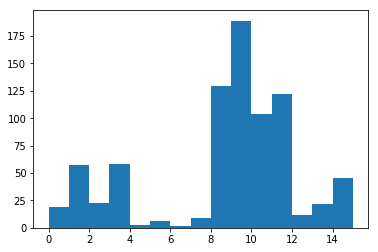

In [20]:
from sklearn.model_selection import train_test_split
trainset, testset, trainlabel, testlabel = train_test_split(proc_data, label,stratify=label, test_size=0.2)
import matplotlib as plt
from matplotlib import pyplot
#plt.plot(x)
pyplot.hist(trainlabel,np.arange(0,16))

In [22]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [23]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(trainset)]

In [26]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,alpha=alpha, min_alpha=0.00025,min_count=1,dm =1)
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    #print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")
print(model)
print(model.docvecs['1'])

c:\users\nikitha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if sys.path[0] == '':


Model Saved
Doc2Vec(dm/m,d20,n5,w5,s0.001,t3)
[ 2.76177    -4.004498   -2.0843873   0.47771147 -2.6269255  -7.056953
 -2.0609355  -1.6964942   3.092422    0.7151465  -1.5753673   1.048497
  0.48033822  1.0966926  -4.626297   -2.6227863   2.5015452  -2.007038
  3.808321    3.5313232 ]


In [32]:
train=[]
for i in range(len(trainset)):
    train.append(model.docvecs[i])


In [30]:
trainset=np.array(train)

In [34]:
from gensim.models.doc2vec import Doc2Vec
test=[]
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
for i in testset:
    test_data = word_tokenize(i.lower())
    test.append(model.infer_vector(test_data))
#print("V1_infer", v1)

# to find most similar doc using tags
#similar_doc = model.docvecs.most_similar('0')
#print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
testset=np.array(test)

[-0.5157035  -1.0797778  -0.34416988 -0.56972986 -1.1667764  -0.6815959
  0.21416909 -0.30321732 -0.21843573 -0.14948896  1.4060634  -0.16612072
  0.84685546 -0.20480268  0.01459601 -1.4408938   1.0172862  -0.32820767
  1.5868679   0.24474065]


In [38]:
testset=np.array(test)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)
model.fit(trainset,trainlabel)
print(model.score(train,trainlabel))

predictionsknn = model.predict(testset)
count=0
for i in range(len(predictionsknn)):
    if predictionsknn[i]==testlabel[i]:
        count=count+1
print("accuracy=",(count*100)/len(testlabel))

0.45
accuracy= 18.5
